<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Módulo 1: Crear una Red Neuronal Recurrente en TensorFlow 2.0



## Paso 1: Importar las librerías necesarias

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

C:\Users\uie70742\.conda\envs\rapy_env\lib\site-packages\scipy\__init__.py:173: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.18.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Paso 2: Pre procesado de datos


### Configurar parámetros del dataset

In [2]:
numero_palabras = 20000
max_tamano = 100


### Carga del dataset de IMDB

In [6]:
data_imdb = imdb.load_data(num_words = numero_palabras)


In [9]:
X_train, y_train = data_imdb[0]
X_test, y_test = data_imdb[1]

In [10]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

### Cortar secuencias de texto de la misma longitud

In [11]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen = max_tamano)

In [12]:
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen = max_tamano)

### Configurar parámetros de la capa de Embedding

In [13]:
vocab_size = numero_palabras
embed_size = 128


## Paso 3: Construir la Red Neuronal Recurrente

### Definir el modelo

In [14]:
model = tf.keras.Sequential()

### Añadir la capa de embedding

In [16]:
X_train.shape

(25000, 100)

In [17]:
model.add(tf.keras.layers.Embedding(vocab_size, embed_size, input_shape = (X_train.shape[1],)))

### Añadir la capa de LSTM

- unidades: 128
- función de activación: tanh

In [ ]:
#!pip install -U numpy==1.18.5 --user

In [18]:
model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))

### Añadir la capa totalmente conectada de salida

- unidades: 1
- función de activación: sigmoid

In [19]:
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


### Compilar el modelo

In [20]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

### Entrenar el modelo

In [21]:
model.fit(X_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
196/196 [==============================] - 33s 166ms/step - loss: 0.4638 - accuracy: 0.7807
Epoch 2/10
196/196 [==============================] - 30s 154ms/step - loss: 0.2872 - accuracy: 0.8859
Epoch 3/10
196/196 [==============================] - 30s 154ms/step - loss: 0.2306 - accuracy: 0.9107
Epoch 4/10
196/196 [==============================] - 30s 153ms/step - loss: 0.1837 - accuracy: 0.9321
Epoch 5/10
196/196 [==============================] - 30s 154ms/step - loss: 0.1515 - accuracy: 0.9454
Epoch 6/10
196/196 [==============================] - 31s 156ms/step - loss: 0.1237 - accuracy: 0.9564
Epoch 7/10
196/196 [==============================] - 30s 155ms/step - loss: 0.1002 - accuracy: 0.9654
Epoch 8/10
196/196 [==============================] - 32s 163ms/step - loss: 0.0770 - accuracy: 0.9732
Epoch 9/10
196/196 [==============================] - 33s 168ms/step - loss: 0.0602 - accuracy: 0.9788
Epoch 10/10
196/196 [==============================] - 31s 159ms/step - l

### Evaluar el modelo

In [23]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_accuracy

782/782 [==============================] - 18s 23ms/step - loss: 0.7287 - accuracy: 0.8168


0.8167600035667419

In [25]:
X_test[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     1,   591,   202,    14,
          31,     6,   717,    10,    10, 18142, 10698,     5,     4,
         360,     7,     4,   177,  5760,   394,   354,     4,   123,
           9,  1035,  1035,  1035,    10,    10,    13,    92,   124,
          89,   488,  7944,   100,    28,  1668,    14,    31,    23,
          27,  7479,    29,   220,   468,     8,   124,    14,   286,
         170,     8,   157,    46,     5,    27,   239,    16,   179,
       15387,    38,    32,    25,  7944,   451,   202,    14,     6,
         717])

In [ ]:
#mejorar el accuracy de la red 1

### Otro Ejemplo: Predecir el precio de las acciones de Google

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset_train = pd.read_csv('Data/Google_Stock_Price_Train.csv')


In [27]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [28]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [29]:
dataset_train['Date'].min()

'1/10/2012'

In [30]:
dataset_train['Date'].max()

'9/9/2016'

In [35]:
dataset_train['Open'].values

array([325.25, 331.27, 329.83, ..., 793.7 , 783.33, 782.75])

In [39]:
training_dataset = dataset_train.iloc[:,1:2].values
training_dataset

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
#Preprocedo de datos
#from sklearn.preprocessing import MinMaxScaler
#MinMaxScaler de training_dataset_scaler = sc.fit_transform(training_dataset)

Text(0, 0.5, 'Price')

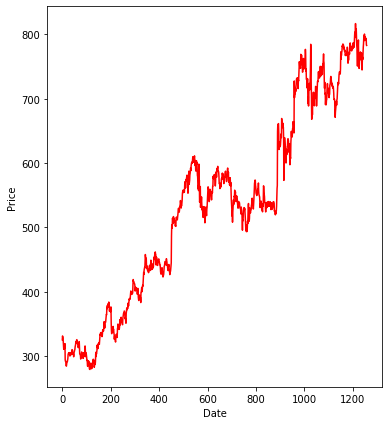

In [40]:
plt.figure(figsize=(6,7))
plt.plot(training_dataset, color='r')
plt.xlabel('Date')
plt.ylabel('Price')

In [41]:
#Crear una estructura de datos que nos permita añadir a la entrada de la RNN
X_train=[]
y_train=[]
seq_size = 60

for i in range(seq_size, training_dataset.shape[0]):
    X_train.append(training_dataset[i-seq_size:i,0])
    y_train.append(training_dataset[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

(batch_size, timesteps) = X_train.shape
#Convertir X_train en un tensro de 3D
X_train = np.reshape(X_train, (batch_size, timesteps,1))

In [43]:
X_train.shape

(1198, 60, 1)

In [45]:
#Construyendo la red

model_google = tf.keras.Sequential()
model_google.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(timesteps,1)))
model_google.add(tf.keras.layers.Dropout(0.2))
model_google.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model_google.add(tf.keras.layers.Dropout(0.2))
model_google.add(tf.keras.layers.LSTM(units=50))
model_google.add(tf.keras.layers.Dropout(0.2))
model_google.add(tf.keras.layers.Dense(1))

model_google.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [46]:
model_google.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])


In [47]:
model_google.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
38/38 [==============================] - 3s 66ms/step - loss: 314427.5938 - accuracy: 0.0000e+00
Epoch 2/100
38/38 [==============================] - 2s 60ms/step - loss: 308032.9375 - accuracy: 0.0000e+00
Epoch 3/100
38/38 [==============================] - 2s 60ms/step - loss: 305196.1250 - accuracy: 0.0000e+00
Epoch 4/100
38/38 [==============================] - 2s 64ms/step - loss: 302692.1875 - accuracy: 0.0000e+00
Epoch 5/100
38/38 [==============================] - 2s 62ms/step - loss: 300453.0312 - accuracy: 0.0000e+00
Epoch 6/100
38/38 [==============================] - 2s 61ms/step - loss: 298240.0000 - accuracy: 0.0000e+00
Epoch 7/100
38/38 [==============================] - 2s 65ms/step - loss: 296068.2188 - accuracy: 0.0000e+00: 1s - loss: 300139.625
Epoch 8/100
38/38 [==============================] - 2s 53ms/step - loss: 293978.0000 - accuracy: 0.0000e+00
Epoch 9/100
38/38 [==============================] - 2s 61ms/step - loss: 291813.6250 - accuracy: 0.0000e

38/38 [==============================] - 3s 80ms/step - loss: 182098.1250 - accuracy: 0.0000e+00
Epoch 75/100
38/38 [==============================] - 3s 80ms/step - loss: 180123.3281 - accuracy: 0.0000e+00
Epoch 76/100
38/38 [==============================] - 3s 79ms/step - loss: 178826.4219 - accuracy: 0.0000e+00: 1s - los
Epoch 77/100
38/38 [==============================] - 3s 78ms/step - loss: 177210.6094 - accuracy: 0.0000e+00
Epoch 78/100
38/38 [==============================] - 3s 67ms/step - loss: 176792.4531 - accuracy: 0.0000e+00
Epoch 79/100
38/38 [==============================] - 3s 72ms/step - loss: 174918.4219 - accuracy: 0.0000e+00
Epoch 80/100
38/38 [==============================] - 2s 64ms/step - loss: 173804.8281 - accuracy: 0.0000e+00
Epoch 81/100
38/38 [==============================] - 3s 67ms/step - loss: 172618.2344 - accuracy: 0.0000e+00: 1s - loss: 16780
Epoch 82/100
38/38 [==============================] - 3s 67ms/step - loss: 171367.9375 - accuracy: 0.0000

In [49]:
# Evaluando el modelo con el conjunto de datos para el testeo
dataset_test = pd.read_csv('Data/Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [51]:
dataset_test['Date'].min(), dataset_test['Date'].max()

('1/10/2017', '1/9/2017')

In [52]:
real_stock_prices = dataset_test.iloc[:,1:2].values

In [54]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
dataset_total.shape

(1278,)

In [55]:
#Generar X_test
first_day_index = len(dataset_total) - len(dataset_test)
first_day_index


1258

In [56]:
inputs = dataset_total[first_day_index -60:].values
inputs = inputs.reshape(-1,1)
#Escalando inputs
#inputs = sc.transform(inputs)

In [57]:
X_test = []
for i in range(seq_size,80):
    X_test.append(inputs[i-seq_size:i,0])

X_test = np.array(X_test)

In [58]:
(batch_size, timesteps) = X_test.shape
X_test = np.reshape(X_test,(batch_size, timesteps,1))

In [59]:
#Predecir los valores de X_test
predicted_stock_price = model_google.predict(X_test)

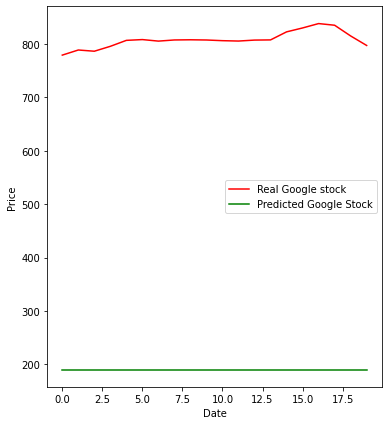

In [60]:
plt.figure(figsize=(6,7))
plt.plot(real_stock_prices, color='r', label='Real Google stock')
plt.plot(predicted_stock_price, color='g', label='Predicted Google Stock')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Generación de texto usando RNN

Cuando se trabaja con texto en un modelo de lenguaje natural (recordar que los tokens son palabras o caracteres), usando cualquier red podríamos modelar la probabilidad del siguiente token (palabra) para construir un modelo de generación de texto. 

Este modelo de lenguaje natural podría capturar la estructura estadística del texto completo. Entonces, podríamos entrenar una red neuronal para predecir el siguiente carácter, ó de manera similar, podríamos entrenar al modelo para que prediga la siguiente palabra, dada una secuencia de palabras. En este apartado implementaremos un modelo a nivel de caracter.


<img src="Figures/63.png" alt="Grayscale Image" width="600">

### Implementing in Tensorflow
#### The Dataset
Usaremos un conjunto de datos que contiene las obras de Shakespeare.

In [ ]:
import tensorflow as tf
import numpy as np

path = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

### Data Pre-Processing

Antes del entrenamiento, necesitamos asignar cadenas a números, extraer secuencias parcialmente superpuestas y empaquetarlas en una matriz numpy 3D de forma (secuencias, maxlen, caracteres únicos). 

### Construyendo la RNN

La red que construiremos será una red con una sola capa LSTM seguida de una ,capa densa con una función de activación softmax.

### Compile and Train the model

Usaremos la función de pérdida `categorical_crossentropy` para entrenar el modelo.

### Train the model

## Generate text